In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit=pd.read_csv("Credit_Risk_data.csv") 
credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
credit.shape

(614, 13)

In [4]:
credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
credit.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
credit.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
credit=credit.drop(["Loan_ID"],axis=1)
credit.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
credit.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Missing value treatment

In [9]:
credit.isnull().sum()  

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
credit.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [11]:
credit.Gender=credit.Gender.fillna("Female")

In [12]:
credit.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [13]:
credit.Married=credit.Married.fillna("No")

In [14]:
credit.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
credit.Dependents=credit.Dependents.fillna("3+")

In [16]:
credit.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
credit.Self_Employed=credit.Self_Employed.fillna("yes")

In [18]:
credit.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [19]:
credit.Loan_Amount_Term=credit.Loan_Amount_Term.fillna(12.0)

In [20]:
credit.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [21]:
credit.Credit_History=credit.Credit_History.fillna(0.0)

In [22]:
credit.LoanAmount.value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [23]:
credit.LoanAmount=credit.LoanAmount.fillna(credit.LoanAmount.median())

### Data type conversion

In [24]:
credit.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
credit.Gender.value_counts()

Gender
Male      489
Female    125
Name: count, dtype: int64

In [27]:
credit.Gender.replace({"Male":0,"Female":1},inplace=True)

In [28]:
credit.Married.value_counts()

Married
Yes    398
No     216
Name: count, dtype: int64

In [29]:
credit.Married.replace({"Yes":1,"No":0},inplace=True)

In [30]:
credit.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [31]:
credit.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     66
Name: count, dtype: int64

In [32]:
credit.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

In [33]:
credit.Self_Employed=le.fit_transform(credit.Self_Employed)

In [34]:
credit.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [35]:
credit.Property_Area.replace({"Semiurban":0,"Urban":1,"Rural":2},inplace=True)

In [36]:
credit.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [37]:
credit.Loan_Status.replace({"Y":1,"N":0},inplace=True)

In [38]:
credit.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

### Duplicate value checking


In [39]:
credit.shape   

(614, 12)

In [40]:
credit.drop_duplicates(inplace=True)

In [41]:
credit.shape   #the shape is same so no duplicates in your data.

(614, 12)

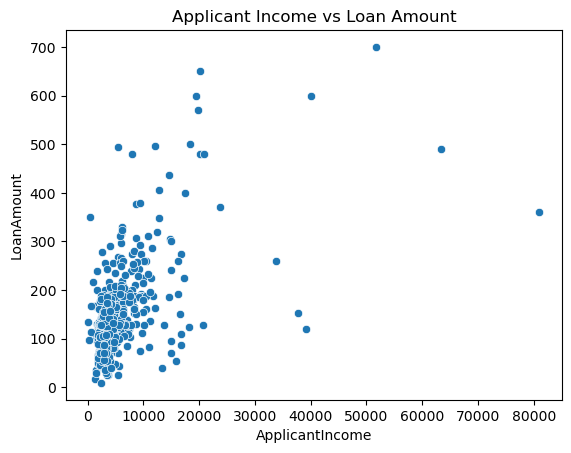

In [42]:
##Numeric vs Numeric:
sns.scatterplot(data=credit, x="ApplicantIncome", y="LoanAmount")
plt.title("Applicant Income vs Loan Amount")
plt.show()

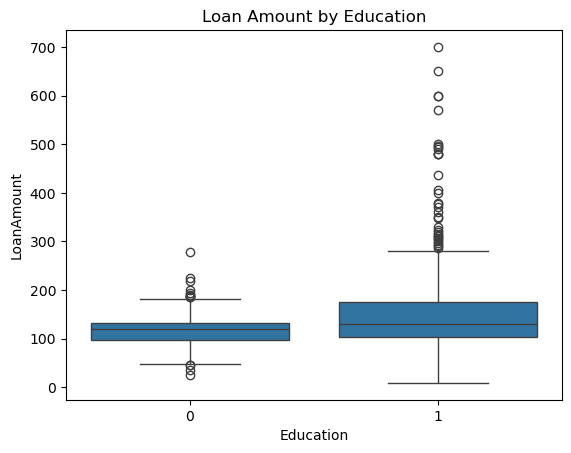

In [43]:
##Categorical vs Numeric:
# Boxplots for loan amount by categorical features
sns.boxplot(data=credit, x="Education", y="LoanAmount")
plt.title("Loan Amount by Education")
plt.show()


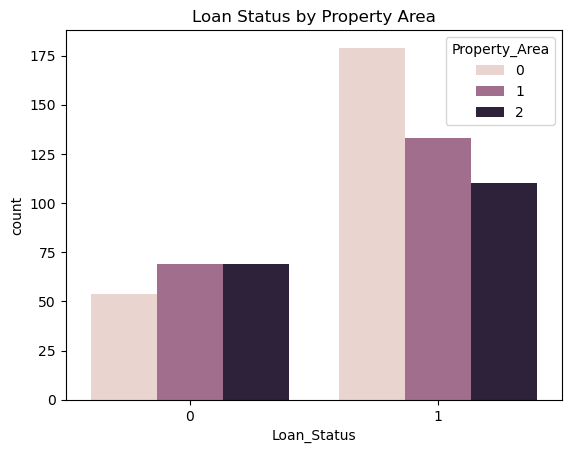

In [44]:
#Categorical vs Categorical:
# Count plots with hue
sns.countplot(data=credit, x="Loan_Status", hue="Property_Area")
plt.title("Loan Status by Property Area")
plt.show()

## Outlier Detection

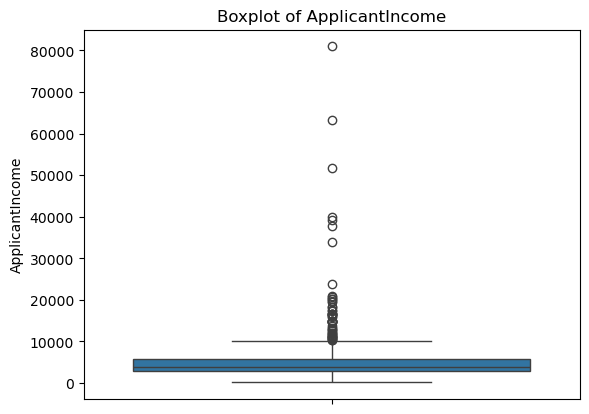

In [45]:
for col in ["ApplicantIncome"]:
    sns.boxplot(y=credit[col])  
    plt.title(f"Boxplot of {col}")
    plt.show()

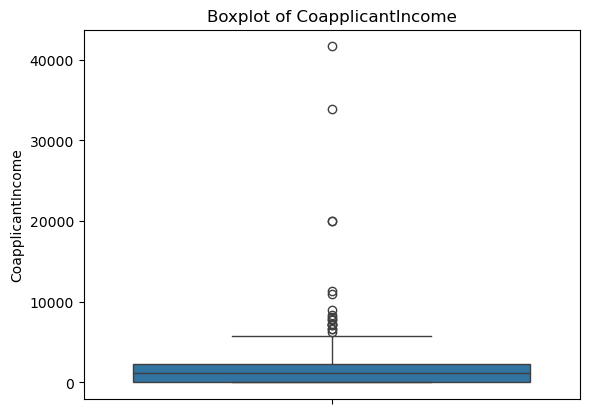

In [46]:
for col in ["CoapplicantIncome"]:
    sns.boxplot(y=credit[col]) 
    plt.title(f"Boxplot of {col}")
    plt.show()

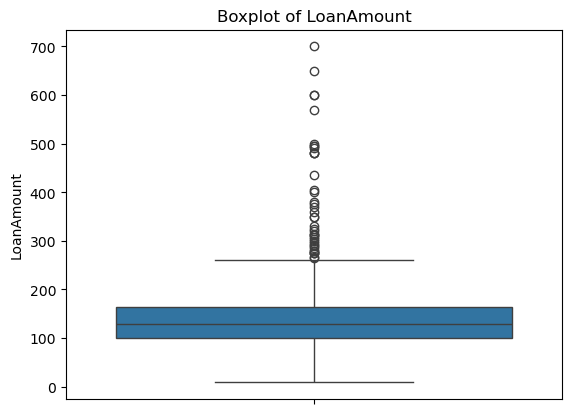

In [47]:
for col in ["LoanAmount"]:
    sns.boxplot(y=credit[col])  
    plt.title(f"Boxplot of {col}")
    plt.show()